In [1]:
# Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [4]:
import numpy as np

# Generate a simple sequence
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_steps = 3

# Prepare the input and output sequences
X, y = [], []
for i in range(len(data) - n_steps):
    X.append(data[i:i + n_steps])
    y.append(data[i + n_steps])

X = np.array(X)
y = np.array(y)

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))



In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Function to create and compile the model
def create_model(units):
    model = Sequential([
        SimpleRNN(units, activation='relu', input_shape=(n_steps, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the model with different number of units
units_list = [4, 8, 16]
history_dict = {}

for units in units_list:
    model = create_model(units)
    history = model.fit(X, y, epochs=100, batch_size=1, verbose=0)
    history_dict[units] = history


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


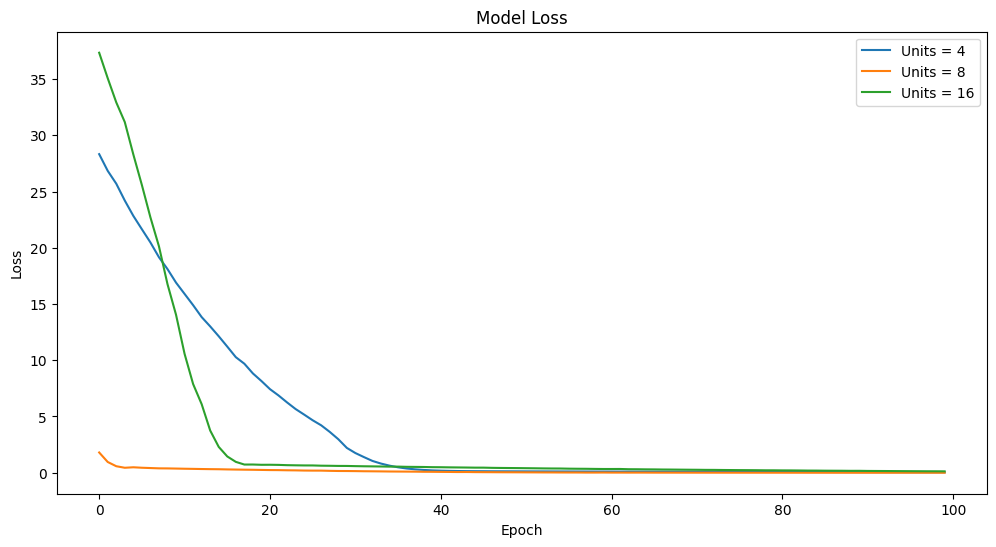

In [6]:
import matplotlib.pyplot as plt

# Plotting the training loss for different units
plt.figure(figsize=(12, 6))
for units, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Units = {units}')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


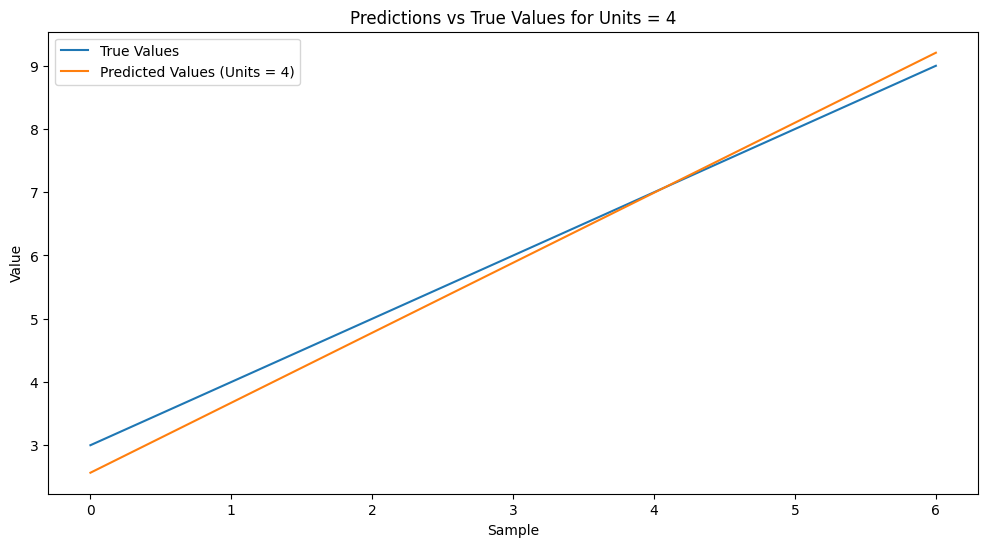

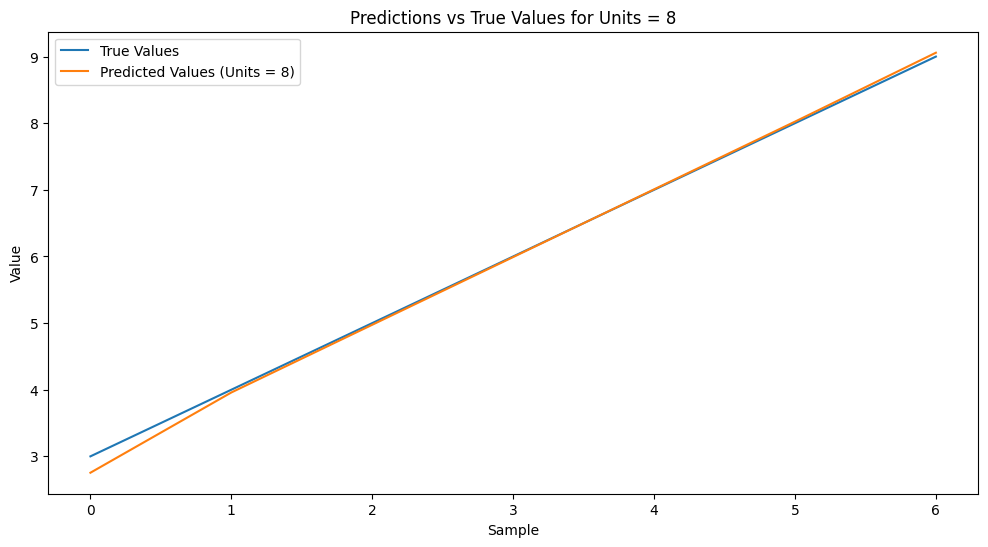

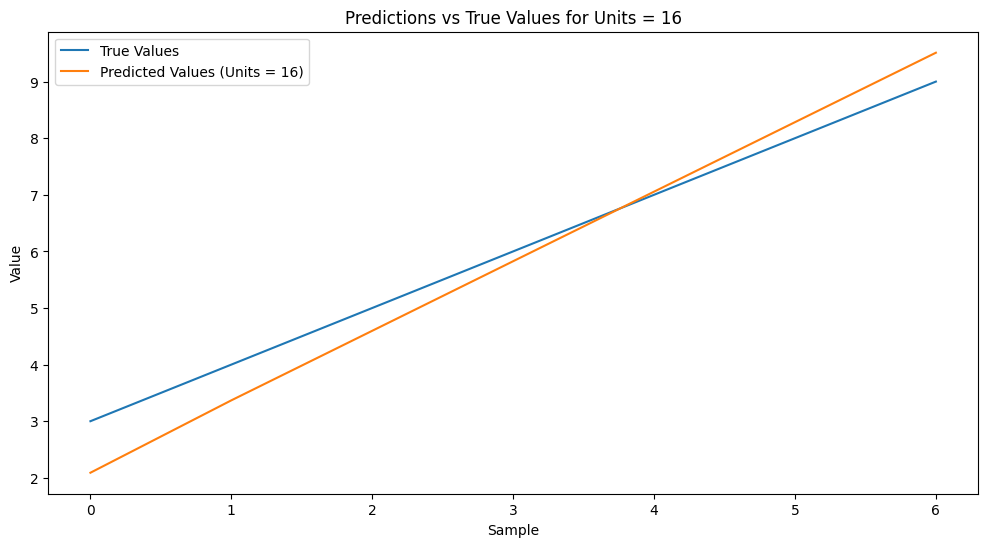

In [7]:
# Make predictions
predictions = {}
for units in units_list:
    model = create_model(units)
    model.fit(X, y, epochs=100, batch_size=1, verbose=0)
    pred = model.predict(X)
    predictions[units] = pred

# Compare predictions with actual values
for units, pred in predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y)), y, label='True Values')
    plt.plot(range(len(pred)), pred, label=f'Predicted Values (Units = {units})')
    plt.title(f'Predictions vs True Values for Units = {units}')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
